# Number of Books Read - Simple Linear Regression

A simple linear regression is a linear approximation of a casual relationship between two variables - the traget (Dependent/ Y variable) and the feature (Independent/ X variable)

## Define the Problem
Can the number of books read per month be predicted based on weekly reading hours?


#### Overview:
This dataset aims to predict the number of books read per month based on the number of hours spent reading each week. This is a fabricated dataset for a simple linear regression analysis.

##### Features:
HoursSpentReading (Feature): The number of hours spent reading per week, ranging from 0 to 20 hours. This feature captures the amount of time an individual dedicates to reading each week.
BooksRead (Target): The number of books read per month, with values ranging from 0 to 10 books. This target variable represents the outcome influenced by the amount of weekly reading time.

---



### Import Libraries

Working in Python 3.9.12 and the Package versions are:
- pandas: 1.5.3
- numpy: 1.23.5
- statsmodels: 0.14.2
- matplotlib: 3.9.2
- seaborn: 0.13.2
- scikit-learn: 1.2.2

In [122]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from statsmodels.stats.stattools import durbin_watson
from sklearn.linear_model import LinearRegression

### Load Data

In [110]:
raw_data = pd.read_csv('book_read.csv')
raw_data

,HoursSpentReading,BooksRead
0,0.010000,0.500000
1,0.000000,0.000000
2,0.021000,0.030000
3,0.100000,0.417181
4,0.206885,0.596929
...,...,...
295,19.552303,4.750000
296,19.554683,4.990000
297,19.644281,5.000000
298,19.950000,4.890000


### Preprocessing
---

In [111]:
data = raw_data.copy()
data.head(10)

,HoursSpentReading,BooksRead
0,0.010000,0.500000
1,0.000000,0.000000
2,0.021000,0.030000
3,0.100000,0.417181
4,0.206885,0.596929
5,0.231462,1.013513
6,0.492698,0.435838
7,0.598656,0.975553
8,0.635807,0.541874
9,0.733052,0.638882


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HoursSpentReading  300 non-null    float64
 1   BooksRead          300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [108]:
data.describe()

,HoursSpentReading,BooksRead
count,300.000000,300.000000
mean,9.368528,2.589829
std,4.531815,1.152038
min,0.000000,0.000000
25%,6.160131,1.702742
50%,9.231365,2.582036
75%,12.599622,3.453016
max,20.000000,5.500000


From the analysis above, nothing is jumping out as disproportionate. Some visuals may help identifying anything out of the norm. 

## Regression Assumptions Check:
- Normality and Homoscedasticity of the error term 
- Linearity
- Endogeneity of Regressors
- No Autocorrelation 
- No Multicollinearity 

#### Check Normality with a Histogram

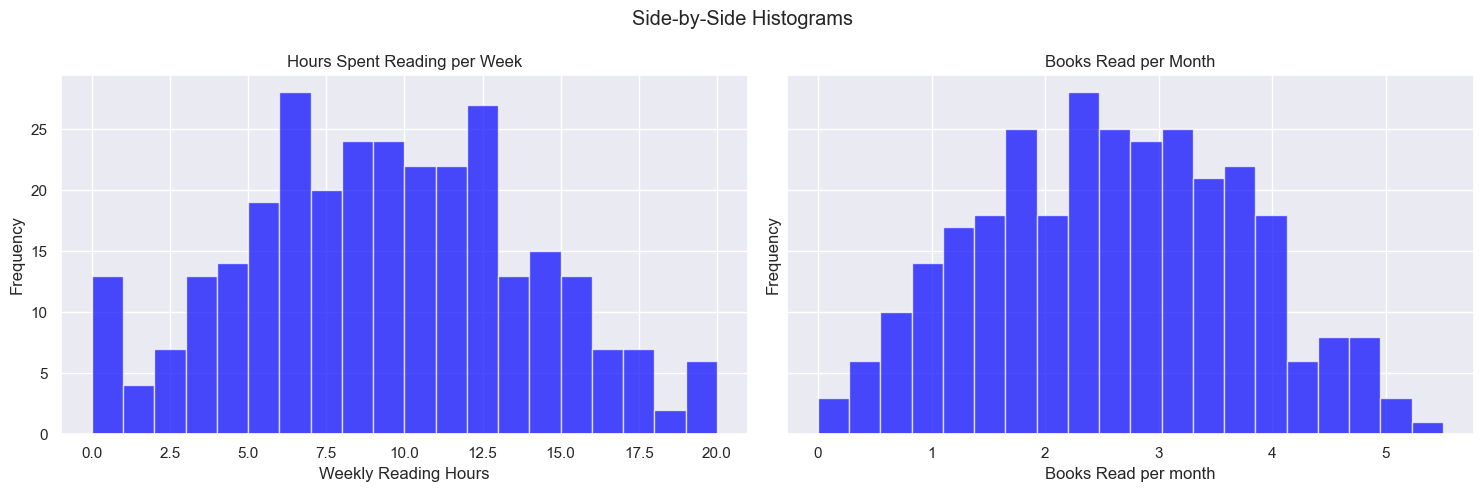

In [ ]:
# Create a 1x2 grid of subplots
# sharey=True to use the same y-axis scale
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)  

# Plot each histogram on a separate subplot
axes[0].hist(data['HoursSpentReading'], bins = 20, color='blue', alpha=0.7)
axes[0].set_title('Hours Spent Reading per Week')
axes[0].set_xlabel('Weekly Reading Hours')
axes[0].set_ylabel('Frequency')

axes[1].hist(data['BooksRead'], bins = 20, color='blue', alpha=0.7)
axes[1].set_title('Books Read per Month')
axes[1].set_xlabel('Books Read per month')
axes[1].set_ylabel('Frequency')

# Add a main title
fig.suptitle('Side-by-Side Histograms')

# Display the plot
plt.tight_layout()
plt.show()

The histograms show a normality around both the hours spent reading per week as well as the books read per month

### Check Homoscedasticity and Linearity with a Scatter Plot

Text(0, 0.5, 'Books Read')

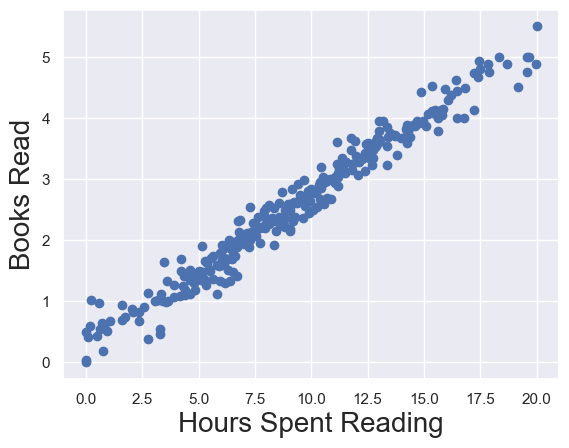

In [113]:
# Scatter plot
y = data['BooksRead']
x1 = data['HoursSpentReading']

plt.scatter(x1,y)
plt.xlabel('Hours Spent Reading', fontsize = 20)
plt.ylabel('Books Read', fontsize = 20)

The scatter plot illustrated Linearity as well as Homoscedasticity as there are not a visible display of outliers

### Check for Autocorrelation with the Durbin Watson Test

- The Durbin-Watson statistic ranges from 0 to 4: 2 indicates no autocorrelation while values below 1 and above 3 cause for alarm

    - Results 2: Indicates no autocorrelation.
    - Results 0 to <2: Indicates positive autocorrelation.
    - Results >2 to 4: Indicates negative autocorrelation.

In [115]:
# Add a constant to the independent variables
x = sm.add_constant(x1)

# Fit the OLS regression model
model = sm.OLS(y, x).fit()

# Calculate the Durbin-Watson statistic on the residuals
dw_statistic = durbin_watson(model.resid)
print("Durbin-Watson Statistic:", dw_statistic)

Durbin-Watson Statistic: 1.8956096748219766


The Result is 1.89 meaning there is a positive autocorrelation but close to 2 that this is not alarming.

### Check for Multicollinearity

As there is only one independent variable (HoursRead) there is no Multicollinearity as that can only arise when 2 or more features have a high correlation

### Check for Endogeneity
Check variables to make sure their p value <= 0.05 - if it is larger then they need to be removed

In [ ]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
#.fit() applys estimation technique (OLS - ordinary least square) to obtain the fit of the model

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BooksRead   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     8711.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          1.21e-222
Time:                        14:37:11   Log-Likelihood:                 43.315
No. Observations:                 300   AIC:                            -82.63
Df Residuals:                     298   BIC:                            -75.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2433      0.028      8.722      0.000       0.188       0.298
HoursSpentReading     0.2503      0.003     93.334      0.000       0.245       0.256
==============================================================================
Omnibus:                        5.961   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                8.764
Skew:                          -0.041   Prob(JB):                       0.0125
Kurtosis:                       3.833   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Hours Spent Reading is has a p value < 0.05 meaning there is statistical evidence to suggest that Hours Spent Reading has a significant effect on the Number of Books read, at a 95% confidence level.

The R-squared is 0.968 meaning Hours Spent Reading explains 96.7% of the variability of the number of Books Read. This is a great model!

## Plot the Predictions

Text(0, 0.5, 'Books Read')

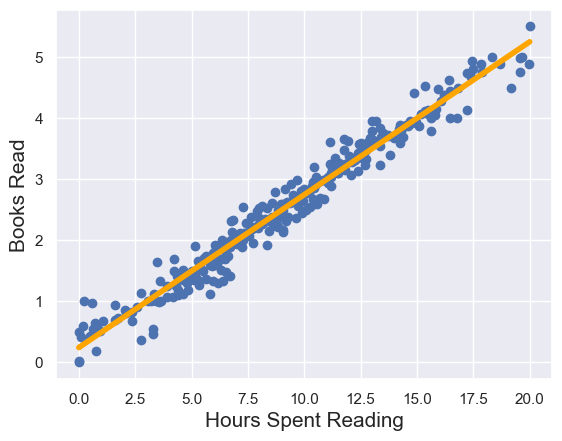

In [118]:
#take the coef from the constant and SAT and add them to the yhat equation
plt.scatter(x1,y)
yhat = 0.2433 + 0.2503*x1
fig = plt.plot(x1, yhat, lw = 4, c = 'orange', label = 'regression line')
plt.xlabel('Hours Spent Reading', fontsize = 15)
plt.ylabel('Books Read', fontsize = 15)

## Regression Testing
---

In [119]:
# create a copy of the data
regression_data = data
regression_data

,HoursSpentReading,BooksRead
0,0.010000,0.500000
1,0.000000,0.000000
2,0.021000,0.030000
3,0.100000,0.417181
4,0.206885,0.596929
...,...,...
295,19.552303,4.750000
296,19.554683,4.990000
297,19.644281,5.000000
298,19.950000,4.890000


### Declare the Inputs and the Targets

In [124]:
# The Targets (y - dependent variable) is 'BooksRead'
targets = regression_data['BooksRead']

# The Inputs (x - independent variable) is 'HoursSpentReading'
inputs = regression_data['HoursSpentReading']

In [125]:
# In order to feed x to sklearn, it should be a 2D array (a matrix) - need to reshape it
# This will not be needed when there is more than 1 feature (as the inputs will be a 2D array by default)

# x_matrix = x.values.reshape(84,1)
inputs_matrix = inputs.values.reshape(-1,1)

# Check the shape just in case
inputs_matrix.shape

(300, 1)

### Train Test Split

In [ ]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# first argument refers to the x's & second argument refers to the y's
x_train, x_test, y_train, y_test = train_test_split(inputs_matrix, targets, test_size=0.2, random_state=365)

### Create the Regression

In [127]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [130]:
# Create a variable to store the predictions based on the training data
y_hat = reg.predict(x_train)

Text(0, 0.5, 'Predictions (y_hat)')

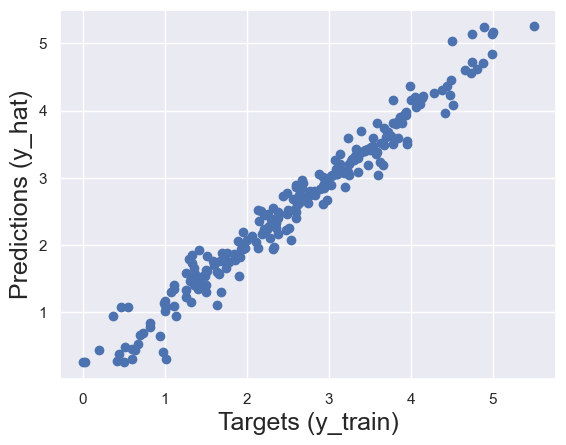

In [131]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

### Plot the Residuals

Text(0.5, 1.0, 'Residuals PDF')

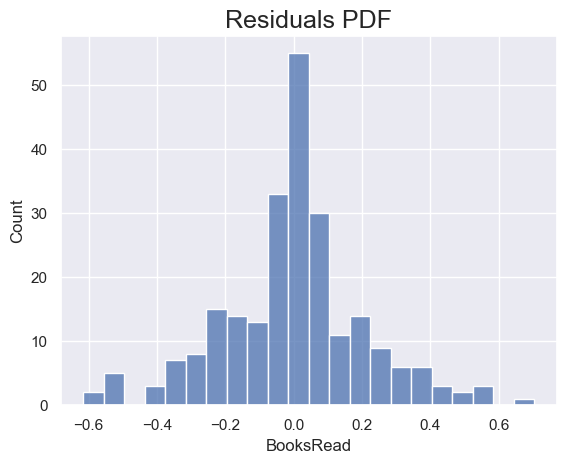

In [132]:
# Plot the PDF of the residuals and check for anomalies
sns.histplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

The plot is normally distributed

### Find the R Squared

In [133]:
reg.score(x_train,y_train)

0.9670149378202088

### Find the Weights and Bias (intercept)

In [134]:
reg.intercept_

0.2521166306746654

In [135]:
reg.coef_

array([0.25005105])

In [145]:
# Create a regression summary
reg_summary = pd.DataFrame([inputs.name], columns=['Features'])
reg_summary['Weights'] = reg.coef_
intercept_row = pd.DataFrame([['Intercept', reg.intercept_]], columns=['Features', 'Weights'])
reg_summary = pd.concat([intercept_row, reg_summary], ignore_index=True)
reg_summary


,Features,Weights
0,Intercept,0.252117
1,HoursSpentReading,0.250051


As the accuracy of the Training Model is 96.7014% and the residuals are normally distributed - I am confident with my model and will test it on the testing data which the algorithm has never seen

### Testing